# Lab 6: Practice Problems.


In [2]:
library(tidyverse)
options(repr.plot.width=8)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
rand_idx = runif(1000, min=1, max=dim(diamonds)[1])
dm = diamonds[rand_idx, ]
names(dm)
dim(dm)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

[1] 1000   10

# Reproduce the following plots

<img src="./graph1.png" alt="drawing" width="600"/>


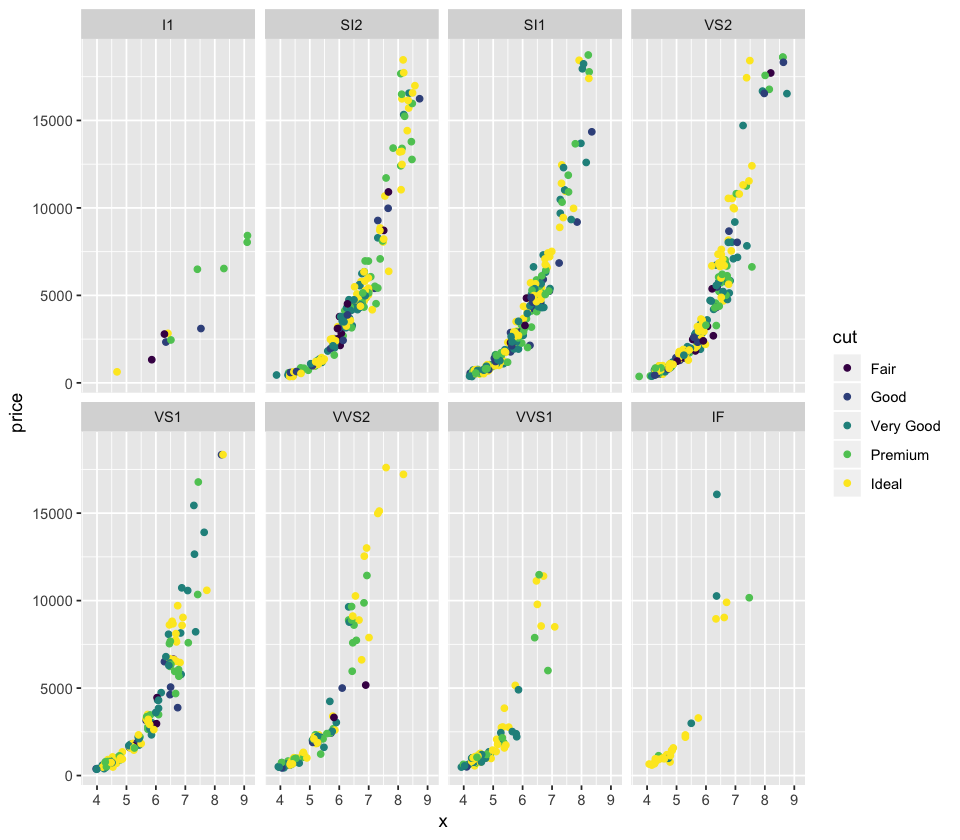

In [4]:
p1 = ggplot(data=dm) + 
    geom_point(mapping = aes(x=x, y=price, color = cut)) + 
    facet_wrap(~clarity, nrow=2)
print(p1)

## Geometric objects
So far we have plotted the points in a fundamental manner. We might be interested in the linear trends of the data that we have.

<img src="./graph2.png" alt="drawing" width="400"/>


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


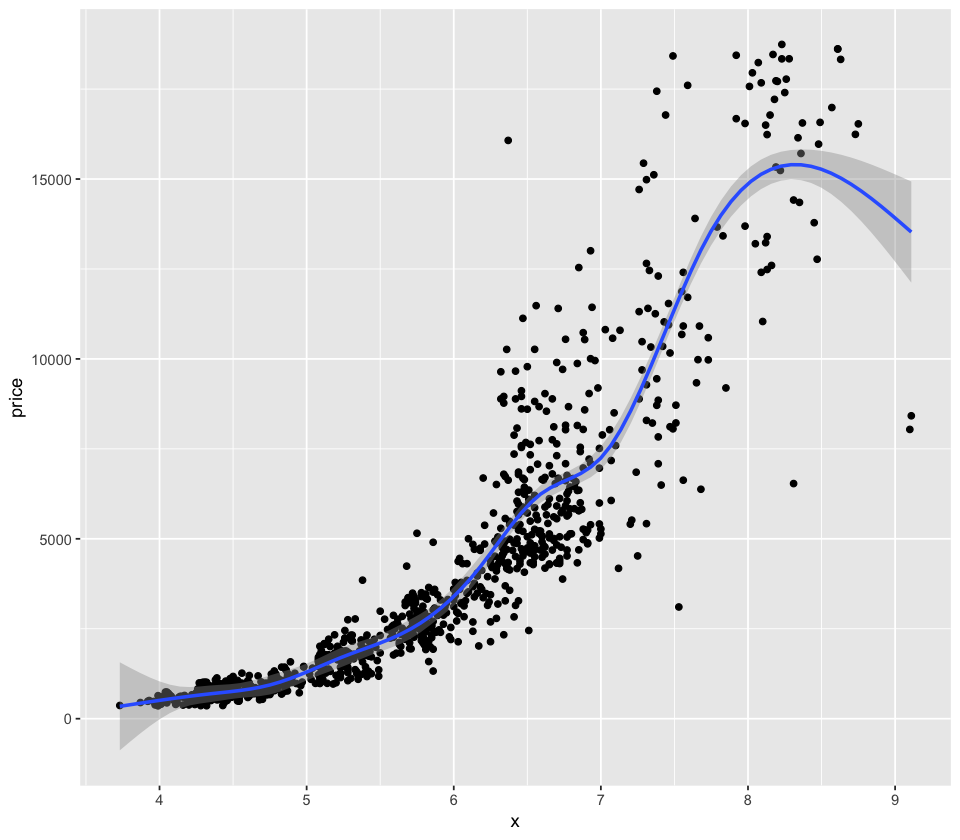

In [5]:
p2 = ggplot(data=dm, mapping = aes(x=x, y=price)) +
    geom_point() +
    geom_smooth()
print(p2)

### 3.6.1 Exercise
1. What geom would you use to draw a line chart? A boxplot? A histogram? An bar chart?
2. Run this code in your head and predict what the output will look like. A reference is here: https://ggplot2.tidyverse.org/reference/


<img src="./graph4.png" alt="drawing" width="450"/>


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


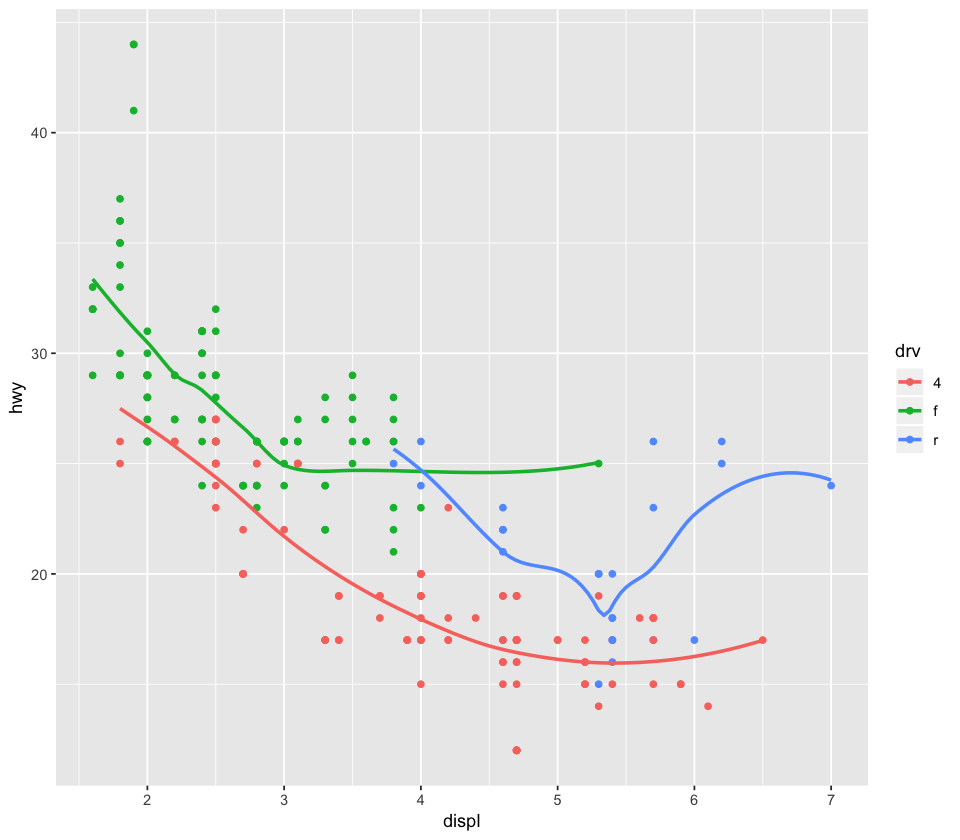

In [7]:
p4 = ggplot(data = mpg, mapping = aes(x=displ, y=hwy, color=drv)) + 
    geom_point() + 
    geom_smooth(se = FALSE)
print(p4)

(hint: consider se=False argument)

## Statistical transformations
stat_summary function

<img src="./graph6.png" alt="drawing" width="450"/>


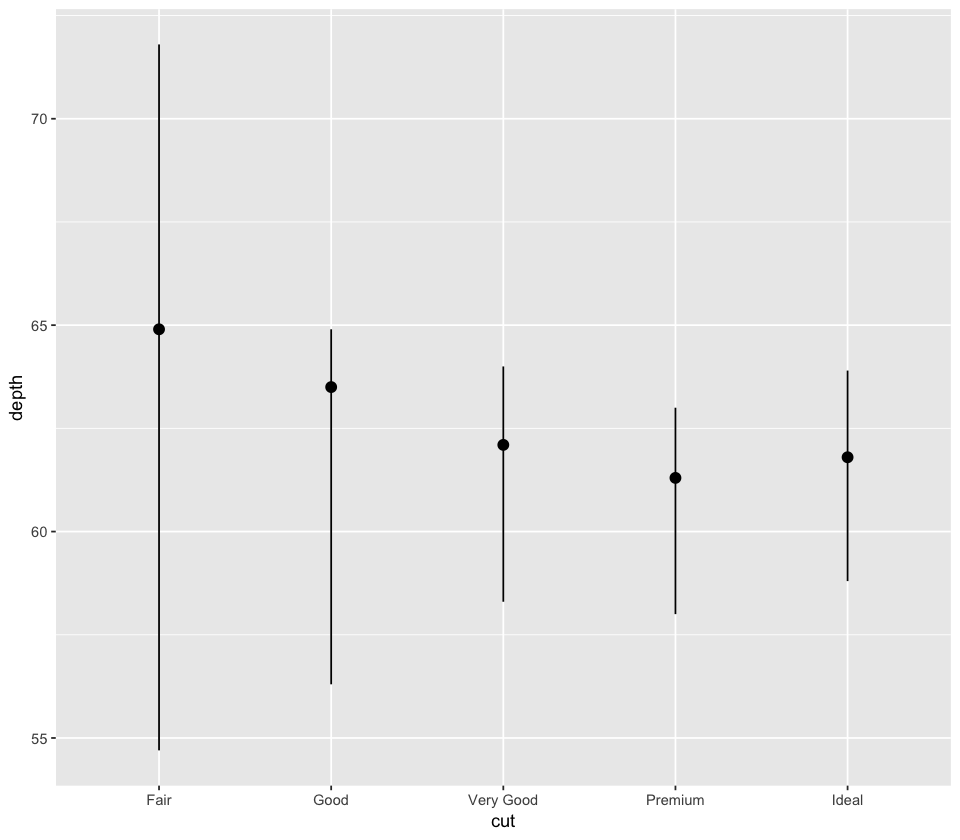

In [8]:
ggplot(data = dm) + 
    stat_summary(
        mapping = aes(x=cut, y=depth),
        fun.ymin = min,
        fun.ymax = max,
        fun.y = median
    )

## Position adjustments

Difference between color and fill:

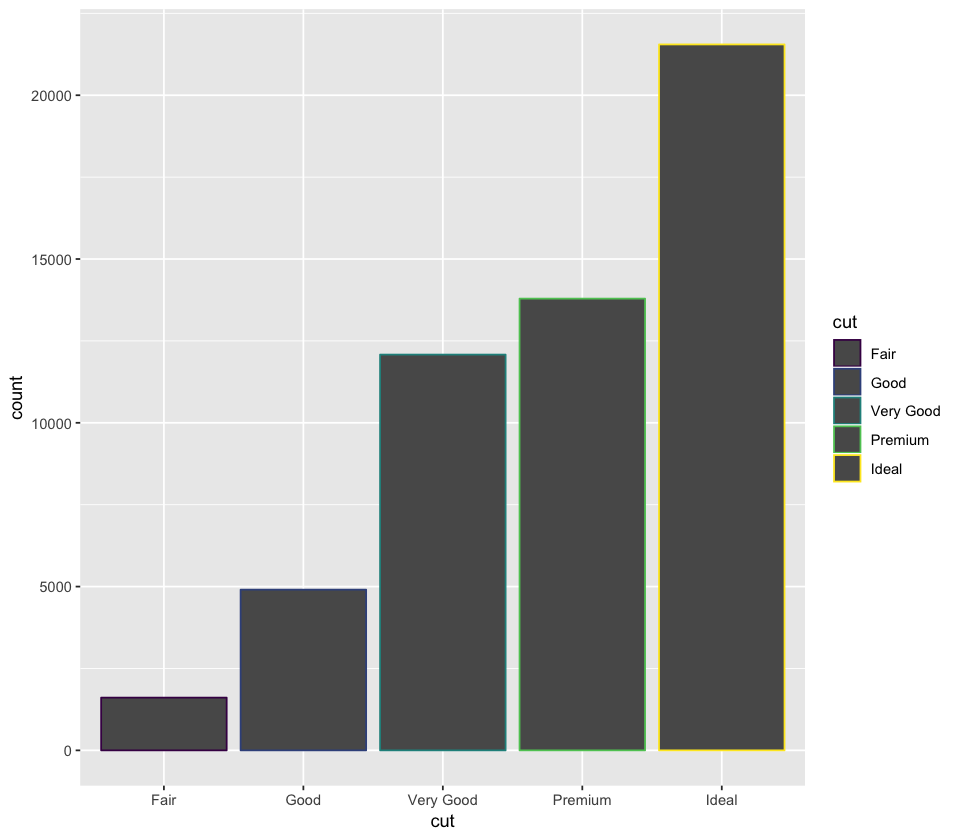

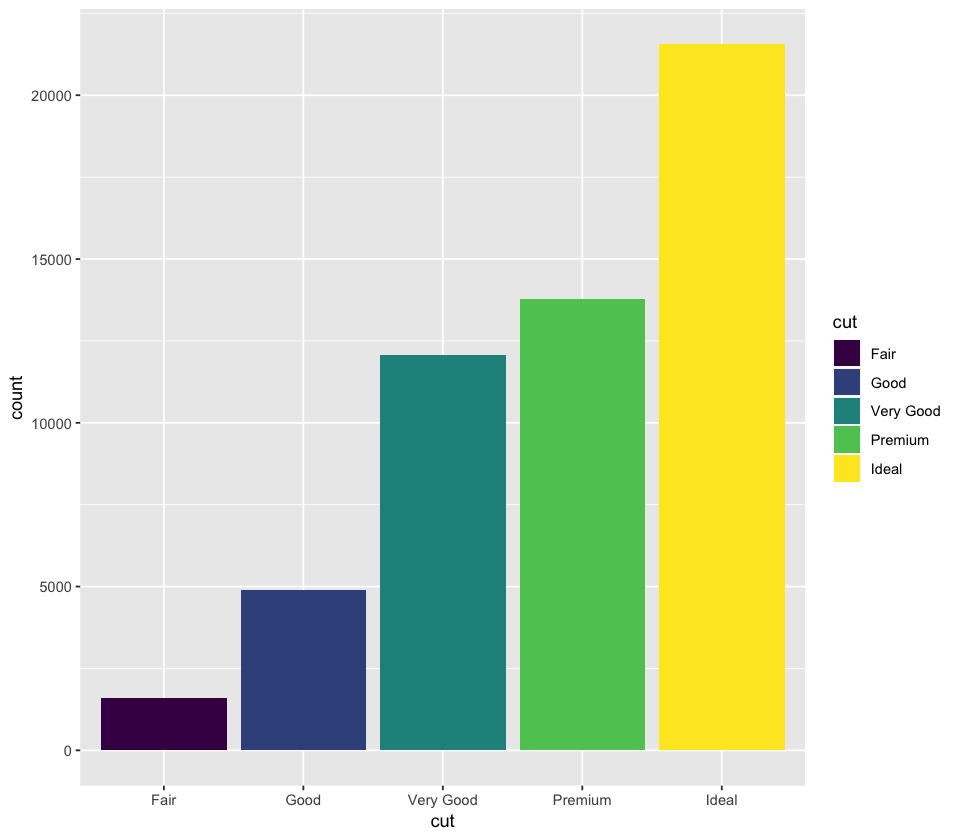

In [9]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, colour = cut))
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = cut))

Remmeber that we can "color by" a different variable - in the following case, clarity. By default, it stacks the bars for each clarity level. This is done using the positional adjustment specified by the position argument of geom_bar. If you don't want a stacked bar chart, you can use one of three other options: "identity", "dodge", or "fill".

<img src="./graph7.png" alt="drawing" width="450"/>


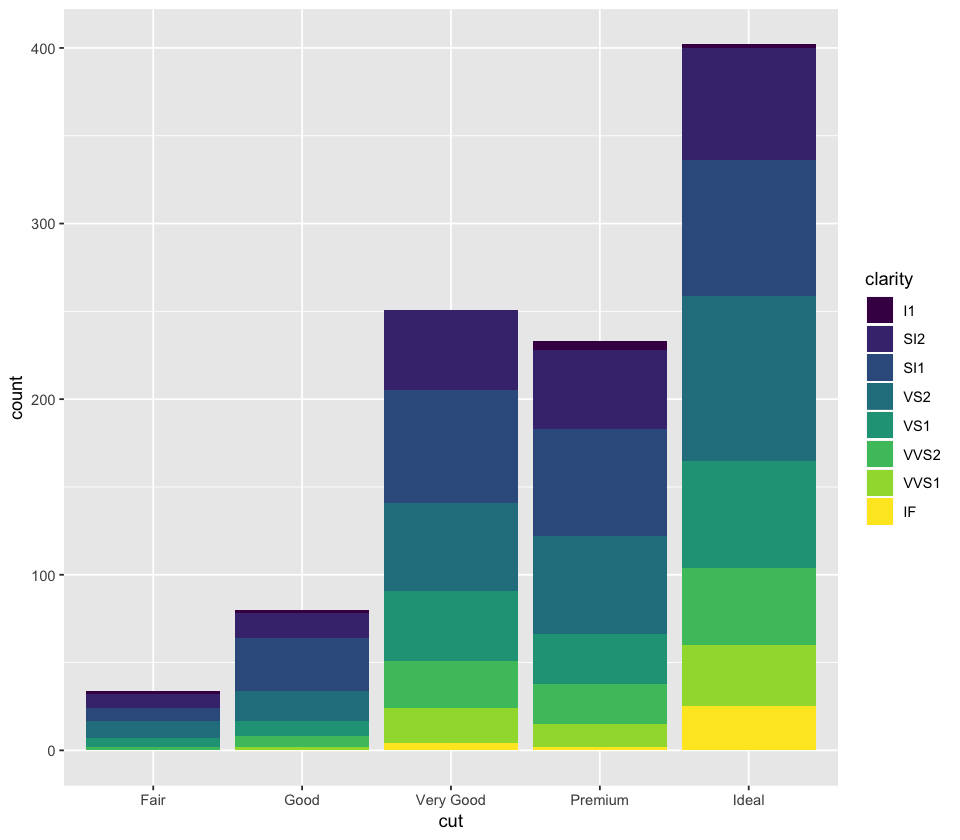

In [10]:
ggplot(data = dm) + 
  geom_bar(mapping = aes(x = cut, fill = clarity))

*position = "identity"*
This will place each object exactly where it falls in the context of the graph. This is not very useful for bars, because it overlaps them. To see that overlapping we either need to make the bars slightly transparent by setting alpha to a small value, or completely transparent by fill=NA

<img src="./graph8.png" alt="drawing" width="500"/>


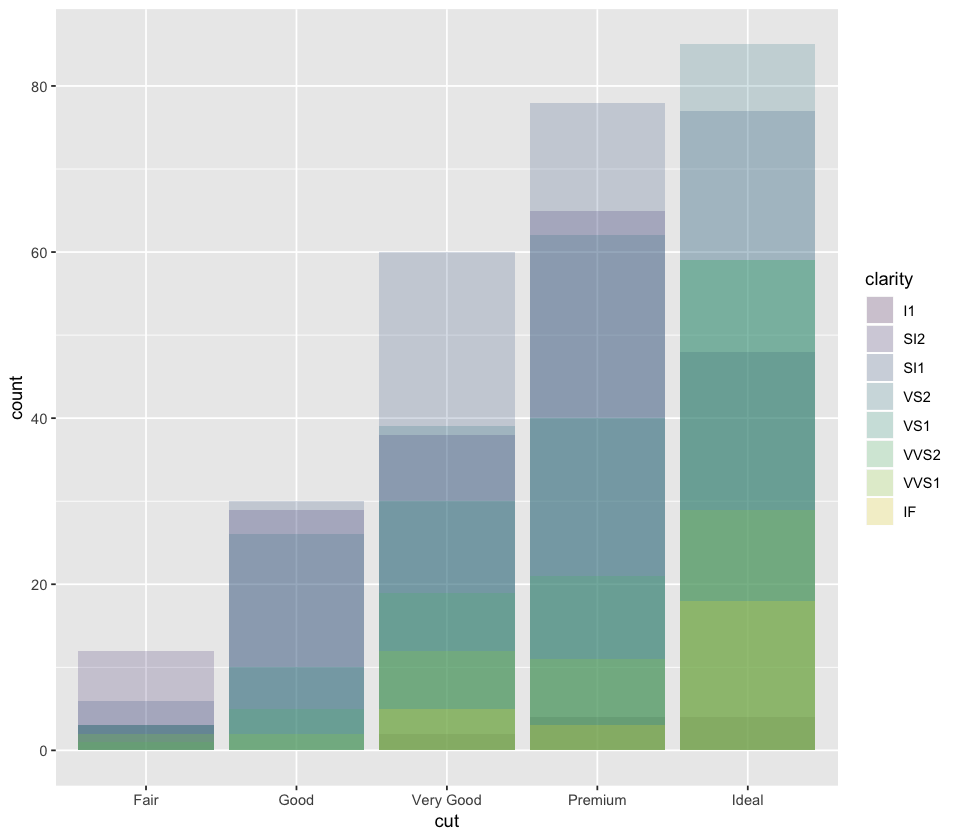

In [9]:
ggplot(data = dm, mapping = aes(x = cut, fill = clarity)) + 
  geom_bar(alpha = 1/5, position = "identity")

*position 'fill'*
This works like stacking, but makes each set of stacked bars the same height. This makes it easier to compare proportions across groups.

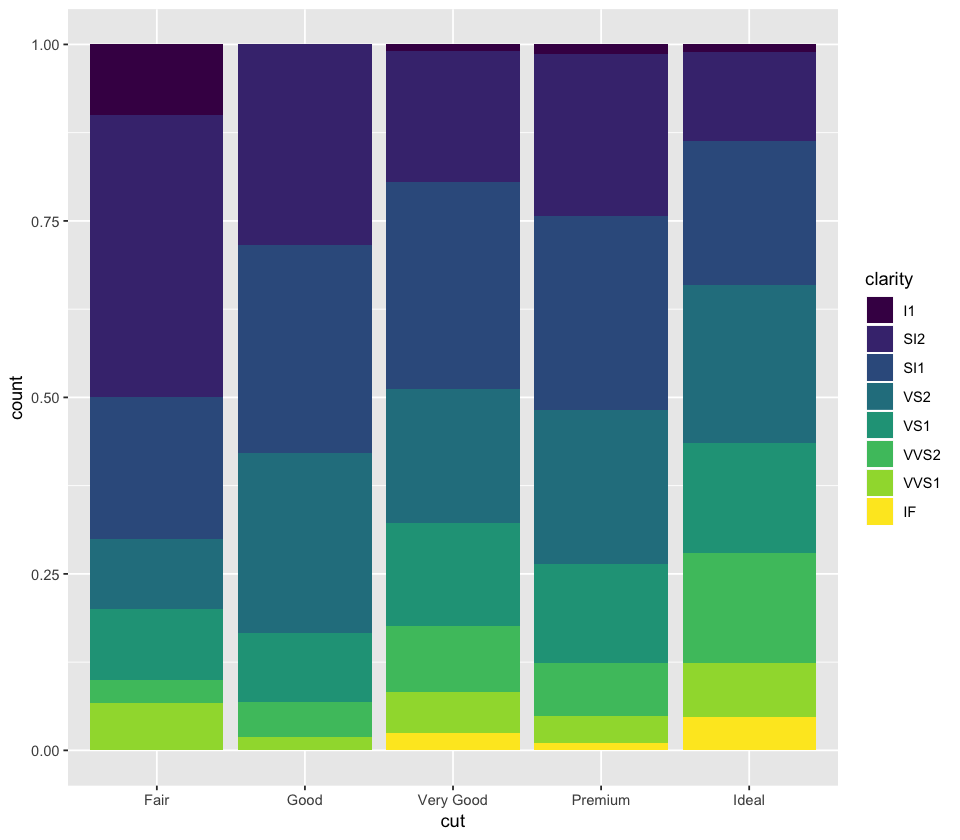

In [10]:
ggplot(data = dm) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill")

The plot below places overlapping objects directly beside one another, which makes it easier to compare individual values.

<img src="./graph10.png" alt="drawing" width="450"/>


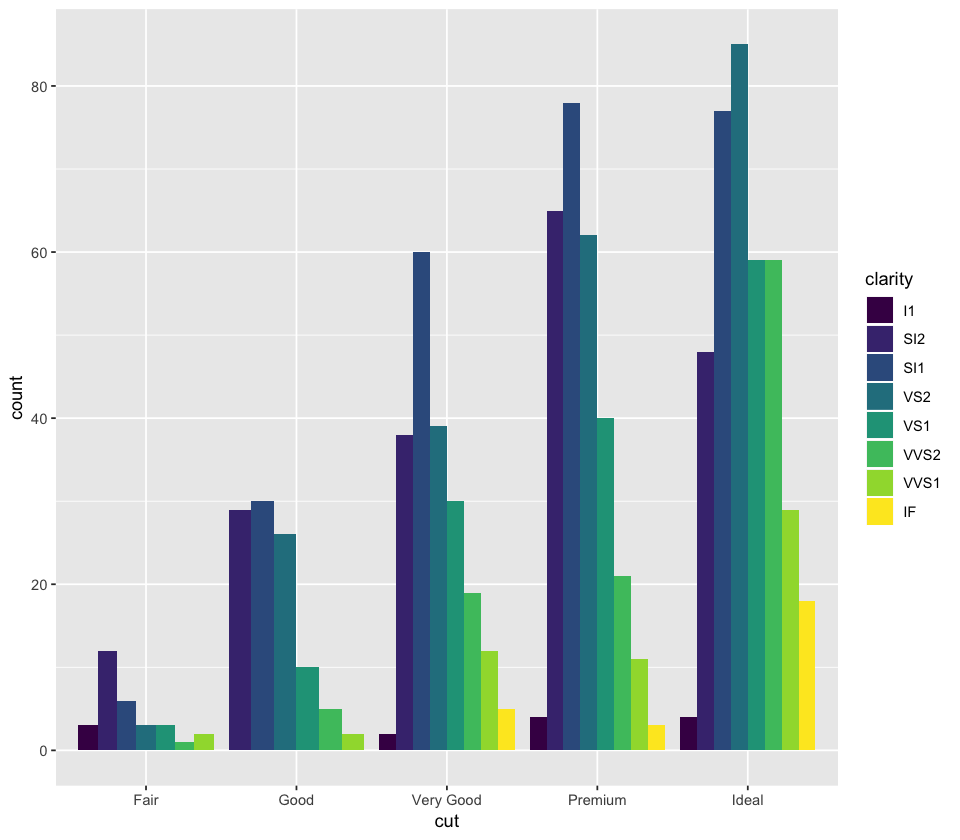

In [11]:
ggplot(data = dm) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge")

# Practice Midterm Solutions and Some Additional Questions

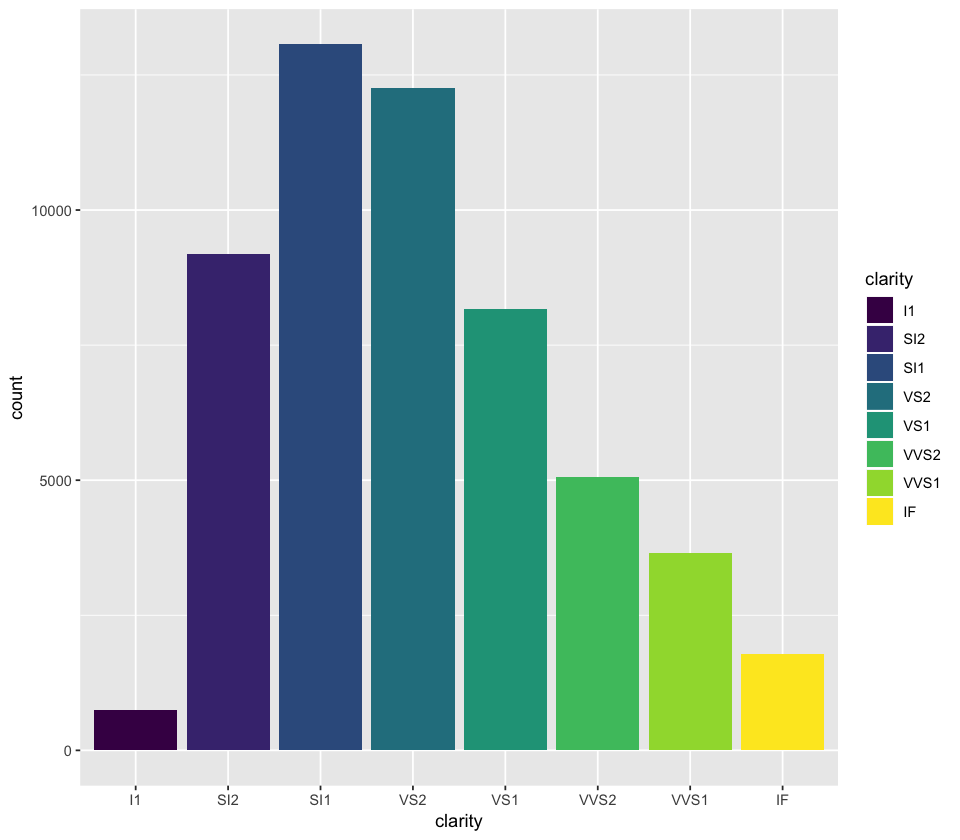

In [12]:
# Problem 6
ggplot(data=diamonds, mapping=aes(x=clarity, fill=clarity)) +
    geom_bar()

Warning message:
“Removed 1 rows containing non-finite values (stat_bin2d).”

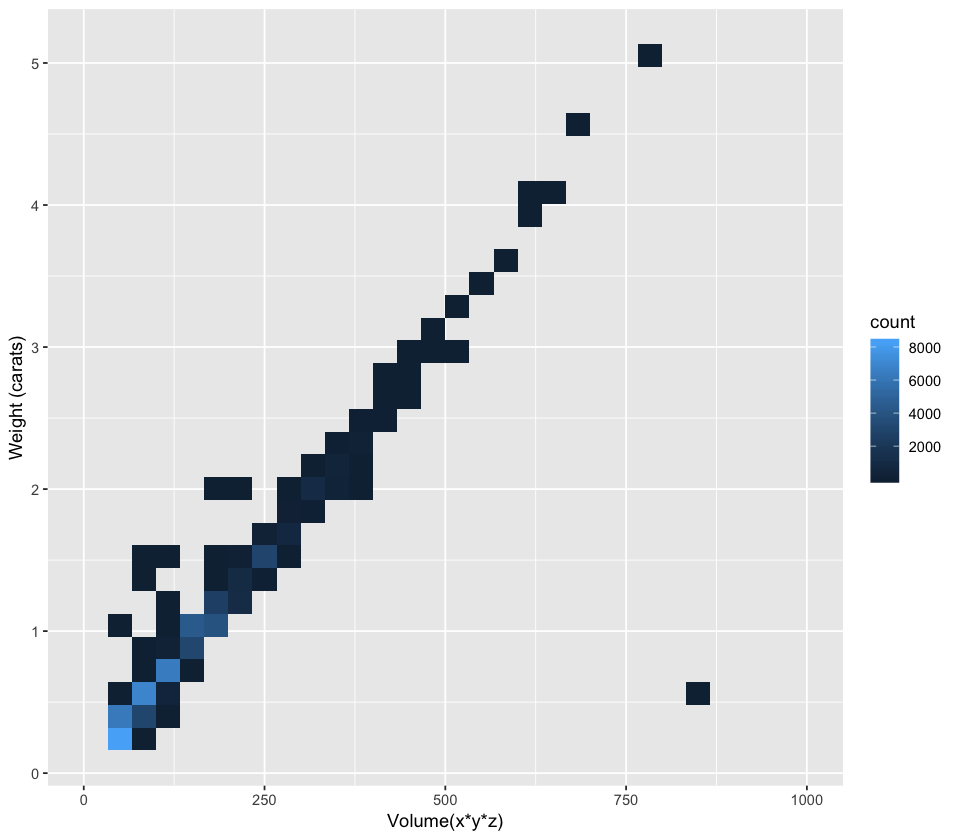

In [13]:
# Problem 7
table7 = diamonds %>% mutate(Volume = x*y*z)
ggplot(data=table7, mapping=aes(x=Volume, y=carat)) + 
    geom_bin2d() + xlim(0, 1000) + 
    xlab('Volume(x*y*z)') + ylab('Weight (carats)')

In [14]:
# Loading football data
load(url('https://github.com/terhorst/stats306/raw/master/ps4/cfb.RData'))

In [15]:
# Reproducing table problem
year_mpg = mpg 
head(year_mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [16]:
# Most 4WD problem
mpg %>% filter(year==1999, drv=='4') %>% 
    group_by(manufacturer, year, drv) %>% summarize(total = n()) %>% 
    arrange(desc(total))

manufacturer,year,drv,total
dodge,1999,4,10
ford,1999,4,9
toyota,1999,4,9
subaru,1999,4,6
audi,1999,4,5
chevrolet,1999,4,2
jeep,1999,4,2
land rover,1999,4,2
mercury,1999,4,2
nissan,1999,4,2


In [18]:
# Finding Big 10 teams
cfb %>% filter(Year==2018) %>% unite(wconf, `Winning Conference`, Winning, sep="_") %>%
        unite(lconf, `Losing Conference`, Losing, sep="_") %>%
        gather(wconf, lconf, key="wl", value="conf_team") %>%
        separate(conf_team, into=c("Conference", "Team"), sep="_") %>%
        filter(Conference == "Big 10") %>% distinct(Team, Conference) %>% print

# A tibble: 14 x 2
   Conference Team          
   <chr>      <chr>         
 1 Big 10     Minnesota     
 2 Big 10     Northwestern  
 3 Big 10     Wisconsin     
 4 Big 10     Michigan State
 5 Big 10     Ohio State    
 6 Big 10     Penn State    
 7 Big 10     Maryland      
 8 Big 10     Illinois      
 9 Big 10     Rutgers       
10 Big 10     Iowa          
11 Big 10     Indiana       
12 Big 10     Michigan      
13 Big 10     Purdue        
14 Big 10     Nebraska      


In [12]:
require(nycflights13)

Loading required package: nycflights13


In [20]:
# Rainyday
rainy_days <- group_by(weather, origin, year, month, day) %>% 
              summarize(t=min(temp, na.rm=T), p=max(precip, na.rm=T)) %>%
              filter(p>0, t>32)
semi_join(flights, rainy_days) %>% nrow

Joining, by = c("year", "month", "day", "origin")


[1] 90596

## Which month had the most missing departure time? How many are missing?

In [20]:
flights %>% group_by(month) %>% summarize(n_missing = sum(is.na(dep_time)))

month,n_missing
1,27004
2,24951
3,28834
4,28330
5,28796
6,28243
7,29425
8,29327
9,27574
10,28889


## In February, what percentage of  flights were on snowy days? 
Let's define snowy days to be similar to rainy days. a) the min temp is less than or equal to freezing and b) precipitation occured during one or more hours in the day

In [16]:
dep_snowy = weather %>% group_by(year, month, day, o) %>%
    summarize(snowy= (min(temp)<=32) & (sum(precip)>0))
dep_flights = flights %>% filter(month == 2) %>% filter(is.na(dep_time)) %>%
    select(year, month, day, dep_time) %>%
    left_join(dep_snowy, by=c('year','month', 'day'))
sum(dep_flights$snowy)
nrow(dep_flights)

kk = dep_snowy %>% filter(month == 2) 
kk$day[kk$snowy]

[1] 1039

[1] 1261

[1]  2  3  5  8  9 11 13 14 16 19 26

In [17]:
weather %>% filter(month == 2, day == 2)

origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
EWR,2013,2,2,0,23.00,6.98,49.69,250,11.50780,NA,0.00,1024.4,10,2013-02-02 00:00:00
EWR,2013,2,2,1,21.92,6.08,49.92,260,13.80936,NA,0.00,1024.8,10,2013-02-02 01:00:00
EWR,2013,2,2,2,21.92,6.08,49.92,260,12.65858,NA,0.00,1025.3,10,2013-02-02 02:00:00
EWR,2013,2,2,3,21.02,6.08,51.86,260,14.96014,NA,0.00,1025.5,10,2013-02-02 03:00:00
EWR,2013,2,2,4,19.94,5.00,51.68,260,14.96014,NA,0.00,1025.5,10,2013-02-02 04:00:00
EWR,2013,2,2,5,19.04,5.00,53.71,260,11.50780,NA,0.00,1025.3,10,2013-02-02 05:00:00
EWR,2013,2,2,6,19.04,5.00,53.71,240,8.05546,NA,0.00,1026.0,10,2013-02-02 06:00:00
EWR,2013,2,2,7,19.94,6.98,56.56,260,10.35702,NA,0.00,1026.5,10,2013-02-02 07:00:00
EWR,2013,2,2,8,21.02,6.08,51.86,250,10.35702,NA,0.00,1026.2,10,2013-02-02 08:00:00
EWR,2013,2,2,9,24.08,6.08,45.59,260,6.90468,NA,0.00,1025.7,10,2013-02-02 09:00:00
